![title](ml_logo.jpg)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# Preprocessing data

### Open CSVs

In [2]:
df = pd.read_csv('csv/generate/hook.csv')

In [3]:
df.head()

,accelerometer0_X0,accelerometer0_X1,accelerometer0_X2,accelerometer0_X3,accelerometer0_X4,accelerometer0_X5,accelerometer0_X6,accelerometer0_X7,accelerometer0_X8,accelerometer0_X9,...,accelerometer8_Z2,accelerometer8_Z3,accelerometer8_Z4,accelerometer8_Z5,accelerometer8_Z6,accelerometer8_Z7,accelerometer8_Z8,accelerometer8_Z9,impact_label,power_measurement
0,-80,-224,64,16,64,96,-16,144,64,-432,...,-160,-128,-48,-96,-256,48,-432,-16,right,27374.118585
1,-32,-64,-144,16,-96,-288,-32,-112,-16,-208,...,0,-32,96,160,256,80,-240,224,right,14375.050665
2,-32,-80,176,112,-48,-400,48,32,-480,-144,...,-224,-656,208,352,176,48,144,-224,right,15932.204646
3,-224,-112,0,-96,-176,-400,-48,-240,80,-432,...,-192,-480,-160,528,288,-160,80,656,right,20737.680117
4,-16,144,-192,-16,-16,-480,64,-256,-64,176,...,416,272,-64,-32,-64,112,256,-176,right,18239.802578


In [4]:
df.describe()

,accelerometer0_X0,accelerometer0_X1,accelerometer0_X2,accelerometer0_X3,accelerometer0_X4,accelerometer0_X5,accelerometer0_X6,accelerometer0_X7,accelerometer0_X8,accelerometer0_X9,...,accelerometer8_Z1,accelerometer8_Z2,accelerometer8_Z3,accelerometer8_Z4,accelerometer8_Z5,accelerometer8_Z6,accelerometer8_Z7,accelerometer8_Z8,accelerometer8_Z9,power_measurement
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,-36.000000,-5.333333,-14.666667,-6.133333,-57.600000,-231.200000,-40.266667,-39.733333,-31.466667,-49.066667,...,35.200000,66.133333,-25.333333,-30.933333,-12.266667,33.333333,-72.266667,64.800000,32.800000,22289.899281
std,129.168396,167.256898,114.026858,150.355902,155.159317,277.760341,159.279508,124.963705,187.262841,272.117489,...,312.408945,303.213493,320.437554,444.332364,329.794074,268.545023,277.433142,342.356975,403.455448,8375.034102
min,-256.000000,-464.000000,-224.000000,-464.000000,-512.000000,-720.000000,-624.000000,-256.000000,-480.000000,-672.000000,...,-896.000000,-784.000000,-912.000000,-2208.000000,-976.000000,-656.000000,-704.000000,-624.000000,-832.000000,12986.695356
25%,-148.000000,-112.000000,-84.000000,-100.000000,-144.000000,-436.000000,-132.000000,-132.000000,-180.000000,-208.000000,...,-148.000000,-88.000000,-216.000000,-116.000000,-196.000000,-128.000000,-244.000000,-180.000000,-208.000000,17313.619701
50%,-32.000000,-16.000000,-16.000000,-16.000000,-48.000000,-192.000000,-16.000000,-32.000000,-72.000000,-16.000000,...,40.000000,40.000000,16.000000,40.000000,0.000000,64.000000,-56.000000,72.000000,32.000000,19514.104684
75%,48.000000,116.000000,32.000000,84.000000,24.000000,-32.000000,52.000000,32.000000,112.000000,120.000000,...,212.000000,232.000000,196.000000,232.000000,168.000000,192.000000,84.000000,340.000000,256.000000,26081.009172
max,256.000000,464.000000,240.000000,304.000000,288.000000,432.000000,240.000000,240.000000,608.000000,752.000000,...,736.000000,768.000000,752.000000,528.000000,704.000000,1008.000000,736.000000,672.000000,1312.000000,55647.949630


### Split dataset in train and test

In [5]:
X = df.loc[:, df.columns != 'impact_label']
y = df['impact_label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [8]:
X_train.head()

,accelerometer0_X0,accelerometer0_X1,accelerometer0_X2,accelerometer0_X3,accelerometer0_X4,accelerometer0_X5,accelerometer0_X6,accelerometer0_X7,accelerometer0_X8,accelerometer0_X9,...,accelerometer8_Z1,accelerometer8_Z2,accelerometer8_Z3,accelerometer8_Z4,accelerometer8_Z5,accelerometer8_Z6,accelerometer8_Z7,accelerometer8_Z8,accelerometer8_Z9,power_measurement
0,32,-144,-16,-32,-112,-80,-16,96,208,-64,...,-160,672,-912,368,-112,-112,-256,192,144,47131.373531
1,-224,-112,0,-96,-176,-400,-48,-240,80,-432,...,640,-192,-480,-160,528,288,-160,80,656,20737.680117
2,-256,240,-48,-112,288,-384,-160,80,192,752,...,176,-192,128,48,-192,64,-160,480,-560,19035.123850
3,-32,-128,-32,-16,208,-160,240,-192,240,-304,...,96,-784,256,176,112,-448,-496,-64,80,24814.668630
4,224,0,-176,240,80,-512,-32,-48,144,0,...,-368,192,-448,-896,-496,496,-160,-448,224,17208.200574


In [9]:
y_train.head()

0     left
1    right
2    right
3    right
4     left
Name: impact_label, dtype: object

### Data standarization

Standarization of datasets is a common requirement for many machine learning estimators. They might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

Here we are going to use StandardScaler, that standardize features by removing the mean and scaling to unit variance. The standard score of a sample $x$ is calculated as:

$x_{scaled} = \dfrac{x - \mu}{\sigma}$

where $\mu$ is the mean of the training samples and $\sigma$ is the standard deviation of the training samples.

In [10]:
X_train_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_train), 
                              columns=X_train.columns.values)

In [11]:
X_train_scaled.head()

,accelerometer0_X0,accelerometer0_X1,accelerometer0_X2,accelerometer0_X3,accelerometer0_X4,accelerometer0_X5,accelerometer0_X6,accelerometer0_X7,accelerometer0_X8,accelerometer0_X9,...,accelerometer8_Z1,accelerometer8_Z2,accelerometer8_Z3,accelerometer8_Z4,accelerometer8_Z5,accelerometer8_Z6,accelerometer8_Z7,accelerometer8_Z8,accelerometer8_Z9,power_measurement
0,0.573533,-0.902213,-0.006062,-0.219861,-0.315506,0.55960,0.155539,1.273563,1.214912,-0.139179,...,-0.641367,1.937153,-2.768957,0.859729,-0.402616,-0.607610,-0.634560,0.396339,0.445224,2.820550
1,-1.446988,-0.716350,0.139420,-0.637815,-0.716678,-0.55960,-0.035894,-1.560325,0.519642,-1.475299,...,1.790356,-0.802127,-1.409651,-0.254682,1.750652,0.862414,-0.238990,0.067524,1.794067,-0.182101
2,-1.699553,1.328151,-0.297024,-0.742303,2.191824,-0.50364,-0.705908,1.138616,1.128003,2.823522,...,0.379957,-0.802127,0.503447,0.184328,-0.671775,0.039201,-0.238990,1.241862,-1.409436,-0.375791
3,0.068403,-0.809282,-0.151543,-0.115373,1.690358,0.27980,1.687000,-1.155484,1.388730,-1.010562,...,0.136784,-2.679041,0.906204,0.454488,0.351028,-1.842429,-1.623485,-0.355237,0.276618,0.281713
4,2.088924,-0.065827,-1.460874,1.556442,0.888012,-0.95132,0.059823,0.059039,0.867277,0.093190,...,-1.273615,0.415331,-1.308962,-1.808104,-1.694578,1.626826,-0.238990,-1.482601,0.655981,-0.583629


In [12]:
X_train_scaled.describe()

,accelerometer0_X0,accelerometer0_X1,accelerometer0_X2,accelerometer0_X3,accelerometer0_X4,accelerometer0_X5,accelerometer0_X6,accelerometer0_X7,accelerometer0_X8,accelerometer0_X9,...,accelerometer8_Z1,accelerometer8_Z2,accelerometer8_Z3,accelerometer8_Z4,accelerometer8_Z5,accelerometer8_Z6,accelerometer8_Z7,accelerometer8_Z8,accelerometer8_Z9,power_measurement
count,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,48.000000,4.800000e+01,4.800000e+01,48.000000,4.800000e+01,4.800000e+01,...,48.000000,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01
mean,-2.775558e-17,-1.850372e-17,3.700743e-17,9.251859e-18,0.000000,-9.251859e-18,2.775558e-17,0.000000,-5.551115e-17,-3.700743e-17,...,0.000000,-3.700743e-17,2.312965e-17,-4.625929e-18,9.251859e-18,-3.238150e-17,-4.625929e-18,4.625929e-18,2.312965e-17,8.326673e-17
std,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582,1.010582e+00,1.010582e+00,1.010582,1.010582e+00,1.010582e+00,...,1.010582,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00
min,-1.699553e+00,-2.760851e+00,-1.897318e+00,-3.041048e+00,-2.822835,-1.678801e+00,-3.481682e+00,-1.695272,-2.522165e+00,-2.346682e+00,...,-2.878552,-2.679041e+00,-2.768957e+00,-4.577248e+00,-2.340558e+00,-2.606841e+00,-2.480554e+00,-1.999310e+00,-2.126009e+00,-1.063884e+00
25%,-9.418574e-01,-7.163497e-01,-4.788758e-01,-6.378147e-01,-0.516092,-7.554603e-01,-5.384044e-01,-0.750643,-7.839894e-01,-6.620088e-01,...,-0.568415,-7.640815e-01,-5.789638e-01,-1.618148e-01,-6.852330e-01,-5.635089e-01,-5.851141e-01,-7.545119e-01,-5.242576e-01,-6.199225e-01
50%,6.840305e-02,-1.122927e-01,-6.061719e-03,-1.153726e-01,0.035520,1.678801e-01,1.076809e-01,-0.008434,-2.625369e-01,3.509736e-02,...,0.088150,-6.657972e-02,2.013787e-01,1.505581e-01,-2.579437e-02,1.862029e-01,-8.241043e-03,4.403766e-02,6.586150e-02,-3.275656e-01
75%,6.998159e-01,7.937929e-01,3.212711e-01,7.466567e-01,0.461766,6.435402e-01,5.623335e-01,0.463880,6.934595e-01,6.160192e-01,...,0.659605,6.182402e-01,6.796531e-01,6.233387e-01,7.009339e-01,5.096080e-01,7.499349e-01,8.308438e-01,6.559806e-01,5.026359e-01
max,2.341489e+00,2.629197e+00,2.321639e+00,1.974396e+00,2.191824,2.350321e+00,1.687000e+00,2.488086,3.387631e+00,2.823522e+00,...,2.082163,2.241517e+00,1.812408e+00,1.197429e+00,1.912148e+00,3.508455e+00,2.200358e+00,1.711597e+00,2.805700e+00,3.789430e+00


In [13]:
X_train_scaled.shape

(48, 271)

# Unsupervised learning: PCA and clustering

The main feature of unsupervised learning algorithms, when compared to classification and regression methods, is that input data are unlabeled (i.e. no labels or classes given) and that the algorithm learns the structure of the data without any assistance. This creates two main differences. First, it allows us to process large amounts of data because the data does not need to be manually labeled. Second, it is difficult to evaluate the quality of an unsupervised algorithm due to the absence of an explicit goodness metric as used in supervised learning.

One of the most common tasks in unsupervised learning is dimensionality reduction. On one hand, dimensionality reduction may help with data visualization while, on the other hand, it may help deal with the multicollinearity of your data and prepare the data for a supervised learning method (e.g. decision trees).

## Principal component analysis (PCA)

Principal Component Analysis is one of the easiest, most intuitive, and most frequently used methods for dimensionality reduction, projecting data onto its orthogonal feature subspace.

More generally speaking, all observations can be considered as an ellipsoid in a subspace of an initial feature space, and the new basis set in this subspace is aligned with the ellipsoid axes. This assumption lets us remove highly correlated features since basis set vectors are orthogonal. In the general case, the resulting ellipsoid dimensionality matches the initial space dimensionality, but the assumption that our data lies in a subspace with a smaller dimension allows us to cut off the "excessive" space with the new projection (subspace). We accomplish this in a 'greedy' fashion, sequentially selecting each of the ellipsoid axes by identifying where the dispersion is maximal.

Let's take a look at the mathematical formulation of this process:

In order to decrease the dimensionality of our data from $n$ to $k$ with $k \leq n$, we sort our list of axes in order of decreasing dispersion and take the top-$k$ of them.

We begin by computing the dispersion and the covariance of the initial features. This is usually done with the covariance matrix. According to the covariance definition, the covariance of two features is computed as follows:

$cov(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j,$
 
where $\mu_i$ is the expected value of the  i th feature. It is worth noting that the covariance is symmetric, and the covariance of a vector with itself is equal to its dispersion.

Therefore the covariance matrix is symmetric with the dispersion of the corresponding features on the diagonal. Non-diagonal values are the covariances of the corresponding pair of features. In terms of matrices where $X$ is the matrix of observations, the covariance matrix is as follows:

$\Sigma = E[(\mathbf{X} - E[\mathbf{X}]) (\mathbf{X} - E[\mathbf{X}])^{T}]$
 
Quick recap: matrices, as linear operators, have eigenvalues and eigenvectors. They are very convenient because they describe parts of our space that do not rotate and only stretch when we apply linear operators on them; eigenvectors remain in the same direction but are stretched by a corresponding eigenvalue. Formally, a matrix $M$ with eigenvector  wi  and eigenvalue $\lambda_i$ satisfy this equation:

$M w_i = \lambda_i w_i$

The covariance matrix for a sample  $X$  can be written as a product of  $\mathbf{X}^{T} \mathbf{X}$ . According to the Rayleigh quotient, the maximum variation of our sample lies along the eigenvector of this matrix and is consistent with the maximum eigenvalue. Therefore, the principal components we aim to retain from the data are just the eigenvectors corresponding to the top- k  largest eigenvalues of the matrix.

The next steps are easier to digest. We multiply the matrix of our data  $X$  by these components to get the projection of our data onto the orthogonal basis of the chosen components. If the number of components was smaller than the initial space dimensionality, remember that we will lose some information upon applying this transformation.

The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance. This is often useful if the models down-stream make strong assumptions on the isotropy of the signal: this is for example the case for Support Vector Machines with the RBF kernel and the K-Means clustering algorithm.

In practice, we would choose the number of principal components such that we can explain 90% of the initial data dispersion

In [14]:
pca_fit = PCA(whiten=True).fit(X_train_scaled)

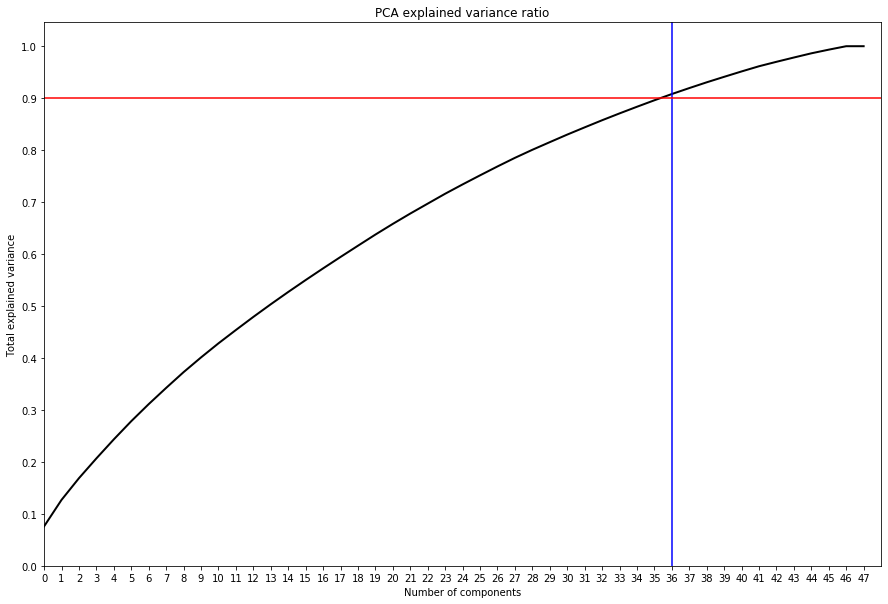

In [15]:
best_n_components = np.where(np.cumsum(pca_fit.explained_variance_ratio_) >= 0.9)[0][0]

plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, min(X_train_scaled.shape))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, min(X_train_scaled.shape), 1))
plt.axvline(best_n_components, c='b')
plt.axhline(0.9, c='r')
plt.title('PCA explained variance ratio')
plt.show();

In [16]:
pca = PCA(whiten=True, n_components=best_n_components)

X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled), 
                           columns=['PCA_' + str(i+1) for i in range(0, best_n_components)])
print('Shape of X_train_pca: ' + str(X_train_pca.shape))

Shape of X_train_pca: (48, 36)


In [17]:
X_train_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31,PCA_32,PCA_33,PCA_34,PCA_35,PCA_36
0,-0.294552,1.180082,-0.004872,0.592956,-0.649412,0.737483,0.246214,0.644493,1.033885,-1.701576,...,-0.646052,-0.392460,0.228950,1.379123,-0.608989,1.257608,0.170190,0.672434,-0.317060,1.360641
1,1.366838,-0.617083,0.584880,-0.070057,2.874622,-0.483463,-0.397108,1.050668,-0.591442,0.504634,...,0.929441,0.322624,-0.040528,0.026206,-0.318825,0.936732,0.351824,0.987570,0.072306,0.262168
2,1.369523,-0.536763,-1.370818,-0.089639,-1.480736,-0.250943,-1.198382,-0.296862,0.218567,0.393881,...,0.749119,-0.358546,-0.382675,-0.770242,0.089821,-0.162437,-0.352966,1.559779,0.906109,0.350341
3,0.314467,0.921702,1.014963,-0.193891,0.270054,-0.092849,-0.849201,-0.870658,-0.141731,-0.069569,...,-0.213596,-1.098089,-0.954068,1.230933,-1.859018,0.877066,-0.040465,-1.502196,-0.728714,-1.379018
4,-1.467978,-0.156834,1.018935,-0.664675,-0.733968,1.567172,1.338387,0.365677,-2.336049,-0.855125,...,-1.002237,-1.299921,0.681323,-0.173279,0.626245,-0.920498,1.067528,2.806757,-1.213778,-0.525602


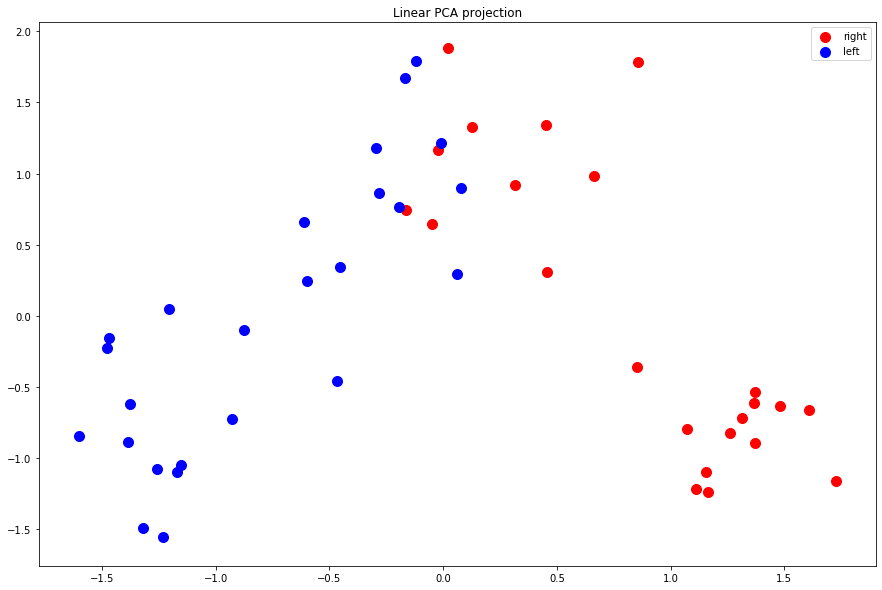

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(X_train_pca[y_train == 'right']['PCA_1'], 
            X_train_pca[y_train == 'right']['PCA_2'], 
            s = 100, c = 'red', label = 'right')
plt.scatter(X_train_pca[y_train == 'left']['PCA_1'], 
            X_train_pca[y_train == 'left']['PCA_2'], 
            s = 100, c = 'blue', label = 'left')
plt.title('Linear PCA projection')
plt.legend()
plt.show()

## Clustering

The main idea behind clustering is pretty straightforward. Basically, we say to ourselves, "I have these points here, and I can see that they organize into groups. It would be nice to describe these things more concretely, and, when a new point comes in, assign it to the correct group." This general idea encourages exploration and opens up a variety of algorithms for clustering.

### K-Means

The K-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields. Here is how it works:

1. Select the number of clusters  k  that you think is the optimal number.
2. Initialize  k  points as "centroids" randomly within the space of our data.
3. Attribute each observation to its closest centroid.
4. Update the centroids to the center of all the attributed set of observations.
4. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).

K-means suffers from various drawbacks:

- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

In [19]:
X_kmeans = X_train_pca[['PCA_1', 'PCA_2']]

kmeans = KMeans(n_clusters= 2, random_state=0, init='k-means++').fit(X_kmeans)
y_kmeans= kmeans.fit_predict(X_kmeans)

print('K-Means cluster center 1: ' + str(kmeans.cluster_centers_[:,0]))
print('K-Means cluster center 2: ' + str(kmeans.cluster_centers_[:,1]))

K-Means cluster center 1: [ 1.2966817  -0.48162463]
K-Means cluster center 2: [-0.82932321  0.30803433]


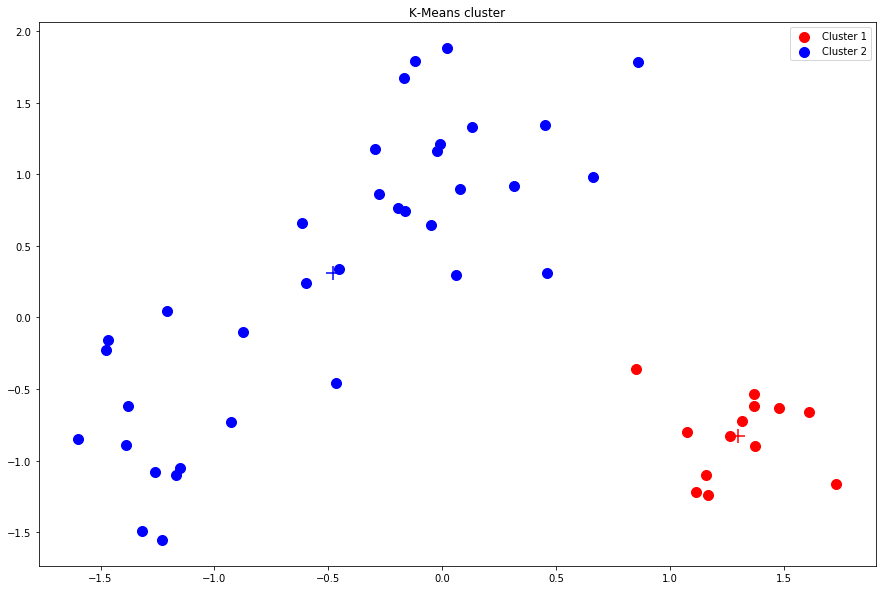

In [20]:
plt.figure(figsize=(15,10))
plt.scatter(X_kmeans[y_kmeans == 0]['PCA_1'], 
            X_kmeans[y_kmeans == 0]['PCA_2'], 
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_kmeans[y_kmeans == 1]['PCA_1'], 
            X_kmeans[y_kmeans == 1]['PCA_2'], 
            s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[0][0], 
            kmeans.cluster_centers_[0][1], 
            c='red', marker='+', s=200)
plt.scatter(kmeans.cluster_centers_[1][0], 
            kmeans.cluster_centers_[1][1], 
            c='blue', marker='+', s=200)
plt.title('K-Means cluster')
plt.legend()
plt.show()

K-Means interpretation:
- Cluster 1: Right hooks
- Cluster 2: Left hooks        

# Classification

In [21]:
X_test_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_test), 
                             columns=X_test.columns.values)
    
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))

## SVM

In [22]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train_scaled, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
accuracy_score(y_test, svm_clf.predict(X_test_scaled))

0.9166666666666666

------------------------------------------------------------------------------------------------------------------

In [24]:
svm_clf2 = svm.SVC(kernel='linear')
svm_clf2.fit(X_train_pca, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
accuracy_score(y_test, svm_clf2.predict(X_test_pca))

0.8333333333333334

## Random Forest

In [26]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_scaled, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
accuracy_score(y_test, rf_clf.predict(X_test_scaled))

0.75

------------------------------------------------------------------------------------------------------------------

In [28]:
rf_clf2 = RandomForestClassifier(random_state=0)
rf_clf2.fit(X_train_pca, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
accuracy_score(y_test, rf_clf2.predict(X_test_pca))

1.0

## XGBoost

## Test models

In [30]:
accuracy_svm_scaled = []
accuracy_svm_pca = []
accuracy_rf_scaled = []
accuracy_rf_pca = []

for i in range(0,1000): 
    X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X, y, test_size=0.2)
    
    X_test_aux_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_test_aux), 
                                     columns=X_test_aux.columns.values)
    
    X_test_aux_pca = pd.DataFrame(pca.transform(X_test_aux_scaled))
    
    accuracy_svm_scaled.append(accuracy_score(y_test_aux, svm_clf.predict(X_test_aux_scaled)))
    accuracy_svm_pca.append(accuracy_score(y_test_aux, svm_clf2.predict(X_test_aux_pca)))
    
    accuracy_rf_scaled.append(accuracy_score(y_test_aux, rf_clf.predict(X_test_aux_scaled)))
    accuracy_rf_pca.append(accuracy_score(y_test_aux, rf_clf2.predict(X_test_aux_pca)))

print('Support vector machine:')
print('\t-> Accuracy SVM with scaled data: ' + str(np.around(np.mean(np.array(accuracy_svm_scaled)), decimals=3)))
print('\t-> Accuracy SVM applied PCA: ' + str(np.around(np.mean(np.array(accuracy_svm_pca)), decimals=3)))

print('\nRandom Forests:')
print('\t-> Accuracy RF with scaled data: ' + str(np.around(np.mean(np.array(accuracy_rf_scaled)), decimals=3)))
print('\t-> Accuracy RF applied PCA: ' + str(np.around(np.mean(np.array(accuracy_rf_pca)), decimals=3)))

Support vector machine:
	-> Accuracy SVM with scaled data: 0.973
	-> Accuracy SVM applied PCA: 0.972

Random Forests:
	-> Accuracy RF with scaled data: 0.954
	-> Accuracy RF applied PCA: 0.958
